#### obs: tentei fazer em R porém perdi muito tempo, vou executar os testes em python mesmo e depois com mais tempo tento novamente na linguagem R

# histograma

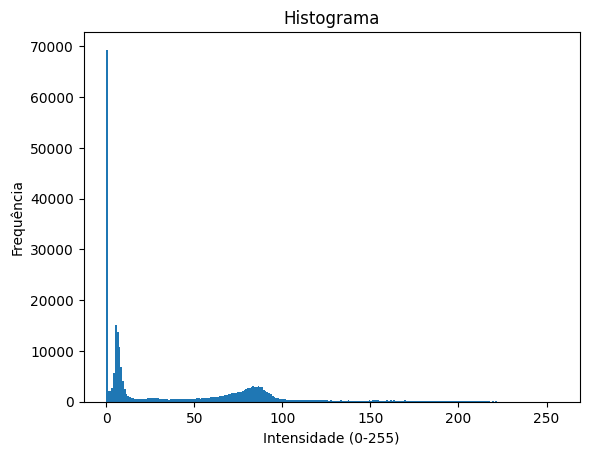

In [1]:
import cv2
import matplotlib.pyplot as plt

# Carregar imagem em escala de cinza
img = cv2.imread("P_1.jpg", cv2.IMREAD_GRAYSCALE)

# Plotar histograma
plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade (0-255)")
plt.ylabel("Frequência")
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.show()

# perfil de linha

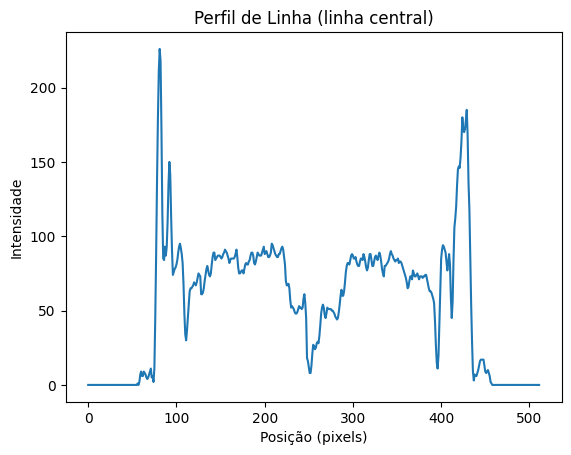

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Carregar imagem em escala de cinza
img = cv2.imread("P_1.jpg", cv2.IMREAD_GRAYSCALE)

# Definir a linha (meio da imagem)
linha = img[img.shape[0] // 2, :]

# Plotar o perfil de linha
plt.figure()
plt.title("Perfil de Linha (linha central)")
plt.xlabel("Posição (pixels)")
plt.ylabel("Intensidade")
plt.plot(linha)
plt.show()

# GLCM (matriz de coocorrência)

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def glcm_metrics(img):
    # Normalizar para 8 bits caso necessário
    if img.max() > 255:
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    glcm = graycomatrix(img,
                        distances=distances,
                        angles=angles,
                        levels=256,
                        symmetric=True,
                        normed=True)

    metrics = {
        'contrast': graycoprops(glcm, 'contrast').mean(),
        'homogeneity': graycoprops(glcm, 'homogeneity').mean(),
        'energy': graycoprops(glcm, 'energy').mean(),
        'correlation': graycoprops(glcm, 'correlation').mean()
    }

    return metrics

# Carregar imagens
orig = cv2.imread("noTumor2Normal.jpg", cv2.IMREAD_GRAYSCALE)
proc = cv2.imread("noTumor2.png", cv2.IMREAD_GRAYSCALE)

m_orig = glcm_metrics(orig)
m_proc = glcm_metrics(proc)

print("\n=== MÉTRICAS ORIGINAIS ===")
print(m_orig)

print("\n=== MÉTRICAS PROCESSADAS ===")
print(m_proc)

# Comparação percentual
print("\n=== VARIAÇÃO (%) ===")
for m in m_orig:
    delta = ((m_proc[m] - m_orig[m]) / m_orig[m]) * 100
    print(f"{m}: {delta:.2f}%")

Contraste (GLCM): 76.64576198630138
